In [147]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
filename = '/Users/davidlichacz/Downloads/ultimate_challenge/ultimate_data_challenge.json' 

In [149]:
# Import file
with open(filename) as f:
    data = json.load(f)
    
df = pd.DataFrame(data)

In [150]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [152]:
# There are some missing values to deal with.  In the case of phone, we will replace missing values with 'Unknown'.
# The other columns with missing values are numerical.  We will replace these with the column means.
df['phone'] = df['phone'].fillna('Unknown')
df = df.fillna(df.mean())

In [153]:
# There are no more missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [154]:
# Convert date fields to datetime objects
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [155]:
# In order to calculate if a rider is active, we will need to know if they took a trip in the 30 preceding
# the pull of the data.  We will estimate the date of data pull with the most recent date of booking.
date_pulled = max(df['last_trip_date'])

In [156]:
# Define function to calculate if rider is active
def is_active(last_date):
    if (date_pulled - last_date).days <= 30:
        return 1
    else:
        return 0

In [157]:
df['Active'] = df['last_trip_date'].apply(is_active)

In [158]:
len(df[df.Active == 1]) / len(df)

0.37608

Therefore, 37.6% of riders are active.

In [159]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


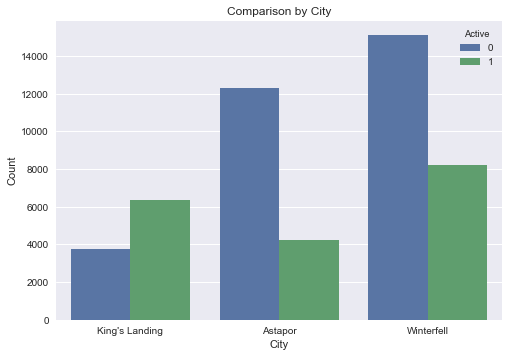

In [160]:
# Compare counts for active vs. inactive users among different categorical variables.
ax = sns.countplot(x="city", hue="Active", data=df)
plt.title('Comparison by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

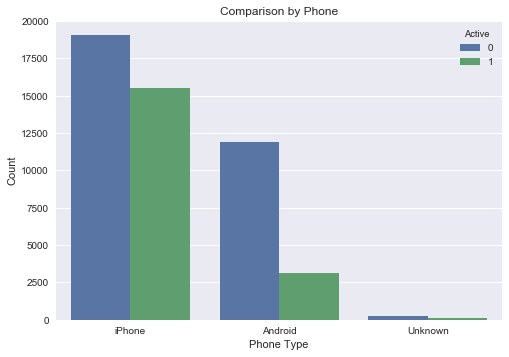

In [161]:
ax = sns.countplot(x="phone", hue="Active", data=df)
plt.title('Comparison by Phone')
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.show()

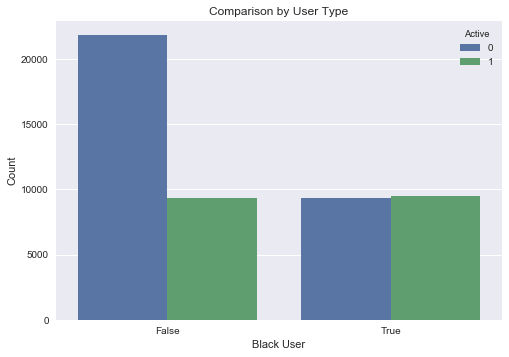

In [162]:
ax = sns.countplot(x="ultimate_black_user", hue="Active", data=df)
plt.title('Comparison by User Type')
plt.xlabel('Black User')
plt.ylabel('Count')
plt.show()

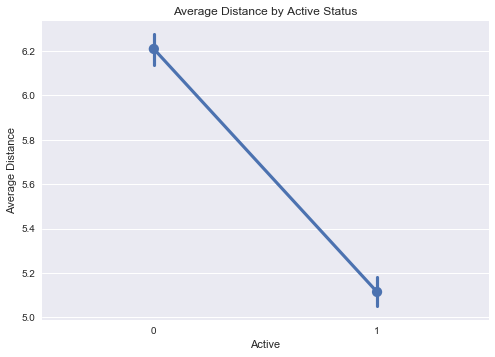

In [163]:
# Also look at comparisions between selected numberical variables.
ax = sns.pointplot(x="Active", y="avg_dist", data=df, dodge=True)
plt.title('Average Distance by Active Status')
plt.xlabel('Active')
plt.ylabel('Average Distance')
plt.show()

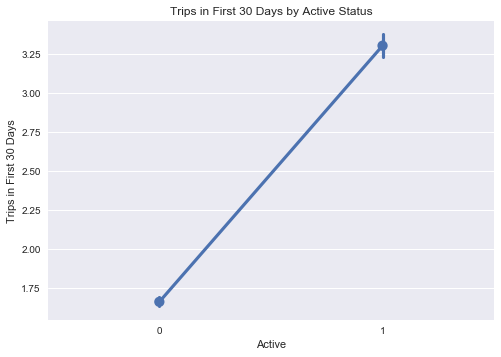

In [164]:
ax = sns.pointplot(x="Active", y="trips_in_first_30_days", data=df, dodge=True)
plt.title('Trips in First 30 Days by Active Status')
plt.xlabel('Active')
plt.ylabel('Trips in First 30 Days')
plt.show()

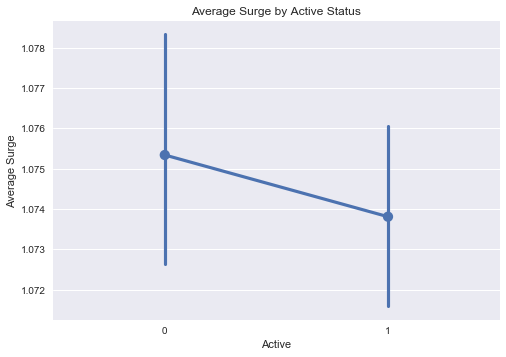

In [165]:
ax = sns.pointplot(x="Active", y="avg_surge", data=df, dodge=True)
plt.title('Average Surge by Active Status')
plt.xlabel('Active')
plt.ylabel('Average Surge')
plt.show()

The above plots show evidence of difference between active and inactive riders which will hopefully will provide some useful features for a classification model. Before fitting a model, some final data cleanup.

In [166]:
# Convert string fields to numeric.
df = pd.get_dummies(df, columns = ['city', 'phone'])
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [167]:
# Drop date columns as these were used to calculate active status.
df = df.drop(['last_trip_date', 'signup_date'], axis=1)

In [198]:
# Separate target variable from the rest of the features.
X = df.drop(['Active'], axis=1)
Y = df['Active']

A Random Forest model will be attempted.  Other classification algorithms that were considered were Logistic Regression, Naive Bayes, SVM and kNN.  All of these could and should be fit to see if better results can be obtained.  For now, we will look at the Random Forest due to its relatively good performance, ease of use and feature importance capability which we will use to make suggestions to the client.

In [218]:
# Fit a Random Forest model.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, df['Active'].values, random_state=5)

clf = RandomForestClassifier()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.74688


Our initial model has 74.6% accuracy.  Let's now test the model using k-fold cross validation.

In [219]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [220]:
clf = RandomForestClassifier()
score = cv_score(clf, Xlr, ylr)
print(score)

0.7473599999999999


The accuracy is slightly higher so the result is consistent.  Let's now tune the model.

In [236]:
#the grid of parameters to search over
n_estimators = [2, 4, 6]
max_depth = [4, 8, 12]

scores = []

for n in n_estimators:
    for d in max_depth:
        clf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=999)
        score = cv_score(clf, Xlr, ylr)
        scores.append(score)

max_index = [i for i, j in enumerate(scores) if j == max(scores)]


print(f'The optimal values are n: {n_estimators[int(np.floor(max_index[0]/len(n_estimators)))]}, d: {max_depth[max_index[0] % len(n_estimators)]} .')

The optimal values are n: 6, d: 12 .


In [237]:
clf = RandomForestClassifier(n_estimators=6, max_depth=12, random_state=999)

# Fit the model on the trainng data.
clf.fit(Xlr,ylr)

# Print the accuracy from the testing data.
acc = accuracy_score(clf.predict(Xtestlr), ytestlr)
print(f'The accuracy on the test set is {acc}.')

The accuracy on the test set is 0.77664.


The accuracy has improved to 77.7% by tuning the parameters.  Let's now examine the most important features.

In [243]:
features = clf.feature_importances_
feature_importances = pd.DataFrame(features, index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

In [244]:
feature_importances

,importance
avg_rating_by_driver,0.163490
weekday_pct,0.143069
avg_surge,0.106687
city_King's Landing,0.103205
avg_dist,0.101548
trips_in_first_30_days,0.067008
avg_rating_of_driver,0.066844
surge_pct,0.062555
ultimate_black_user,0.058453
phone_iPhone,0.050959


Examining the top features, we see that the most important feature is avg_rating_by_driver.  This suggests that the drivers themselves are the best judges of whether a customer will continue using the service.  Leveraging the input of the drivers could help the company decide which riders to target.

The second most important feature is weekday_pct.  The company could use this information to offer deals to riders who only use the service on weekends in an attempt to convert them to more regular users.

The least important feature appears to be the type of phone used by the rider which is not a surprising result.